In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from osgeo import gdal

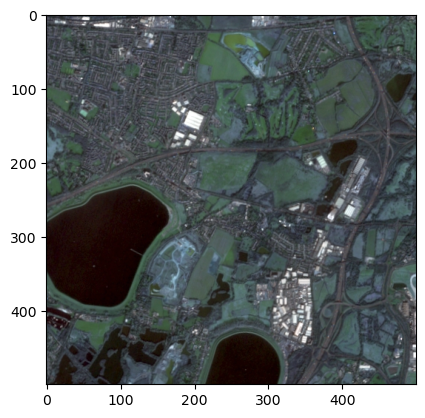

In [17]:
# Read the image using OpenCV
img = cv2.imread("/home/h00pyfr00d/Downloads/data/20230215-SE2B-CGG-GBR-MS3-L3-RGB-preview.jpg", cv2.IMREAD_COLOR)

# Render the image using Matplotlib
plt.imshow(img)

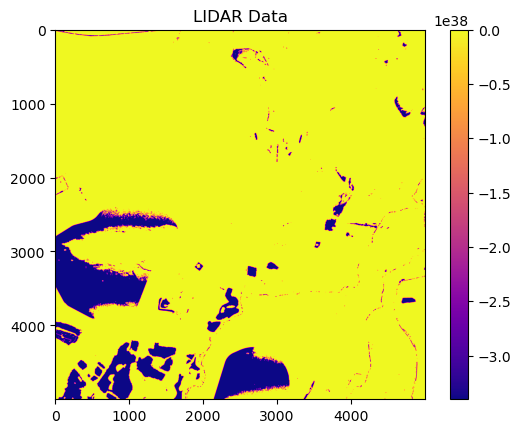

In [18]:
lidar = gdal.Open("/home/h00pyfr00d/Downloads/data/DSM_TQ0075_P_12757_20230109_20230315.tif")
# Read the first band of the LIDAR data
lidar_band = lidar.GetRasterBand(1)
lidar_data = lidar_band.ReadAsArray()

# Plot the LIDAR data using Matplotlib
plt.imshow(lidar_data, cmap='plasma')
plt.colorbar()
plt.title('LIDAR Data')
plt.show()

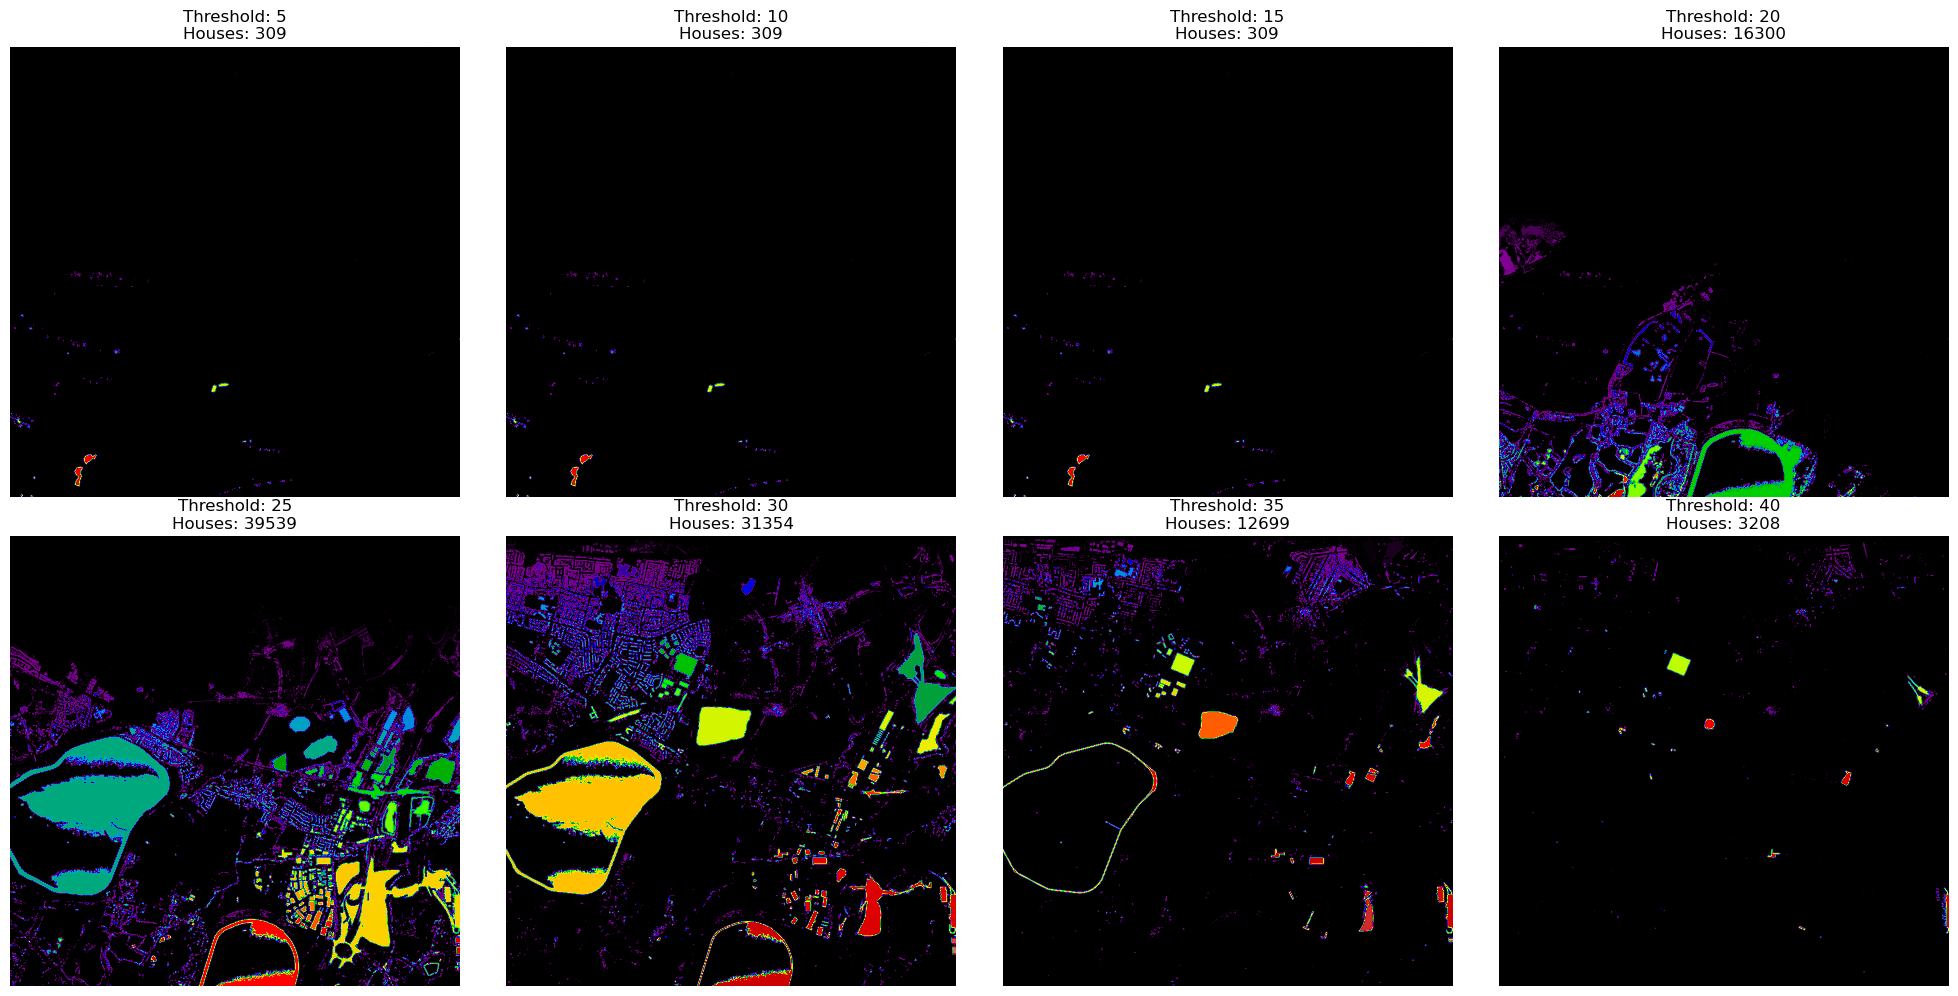

In [5]:
threshold_values = [5 * n for n in range(1, 10)]
fig, axes = plt.subplots(2, len(threshold_values) // 2, figsize=(20, 10))

for ax, threshold in zip(axes.flatten(), threshold_values):
    house_regions = lidar_data > threshold
    num_labels, labels_im = cv2.connectedComponents(house_regions.astype(np.uint8))
    
    ax.imshow(labels_im, cmap='nipy_spectral')
    ax.set_title(f'Threshold: {threshold}\nHouses: {num_labels - 1}')
    ax.axis('off')

plt.tight_layout()
plt.show()


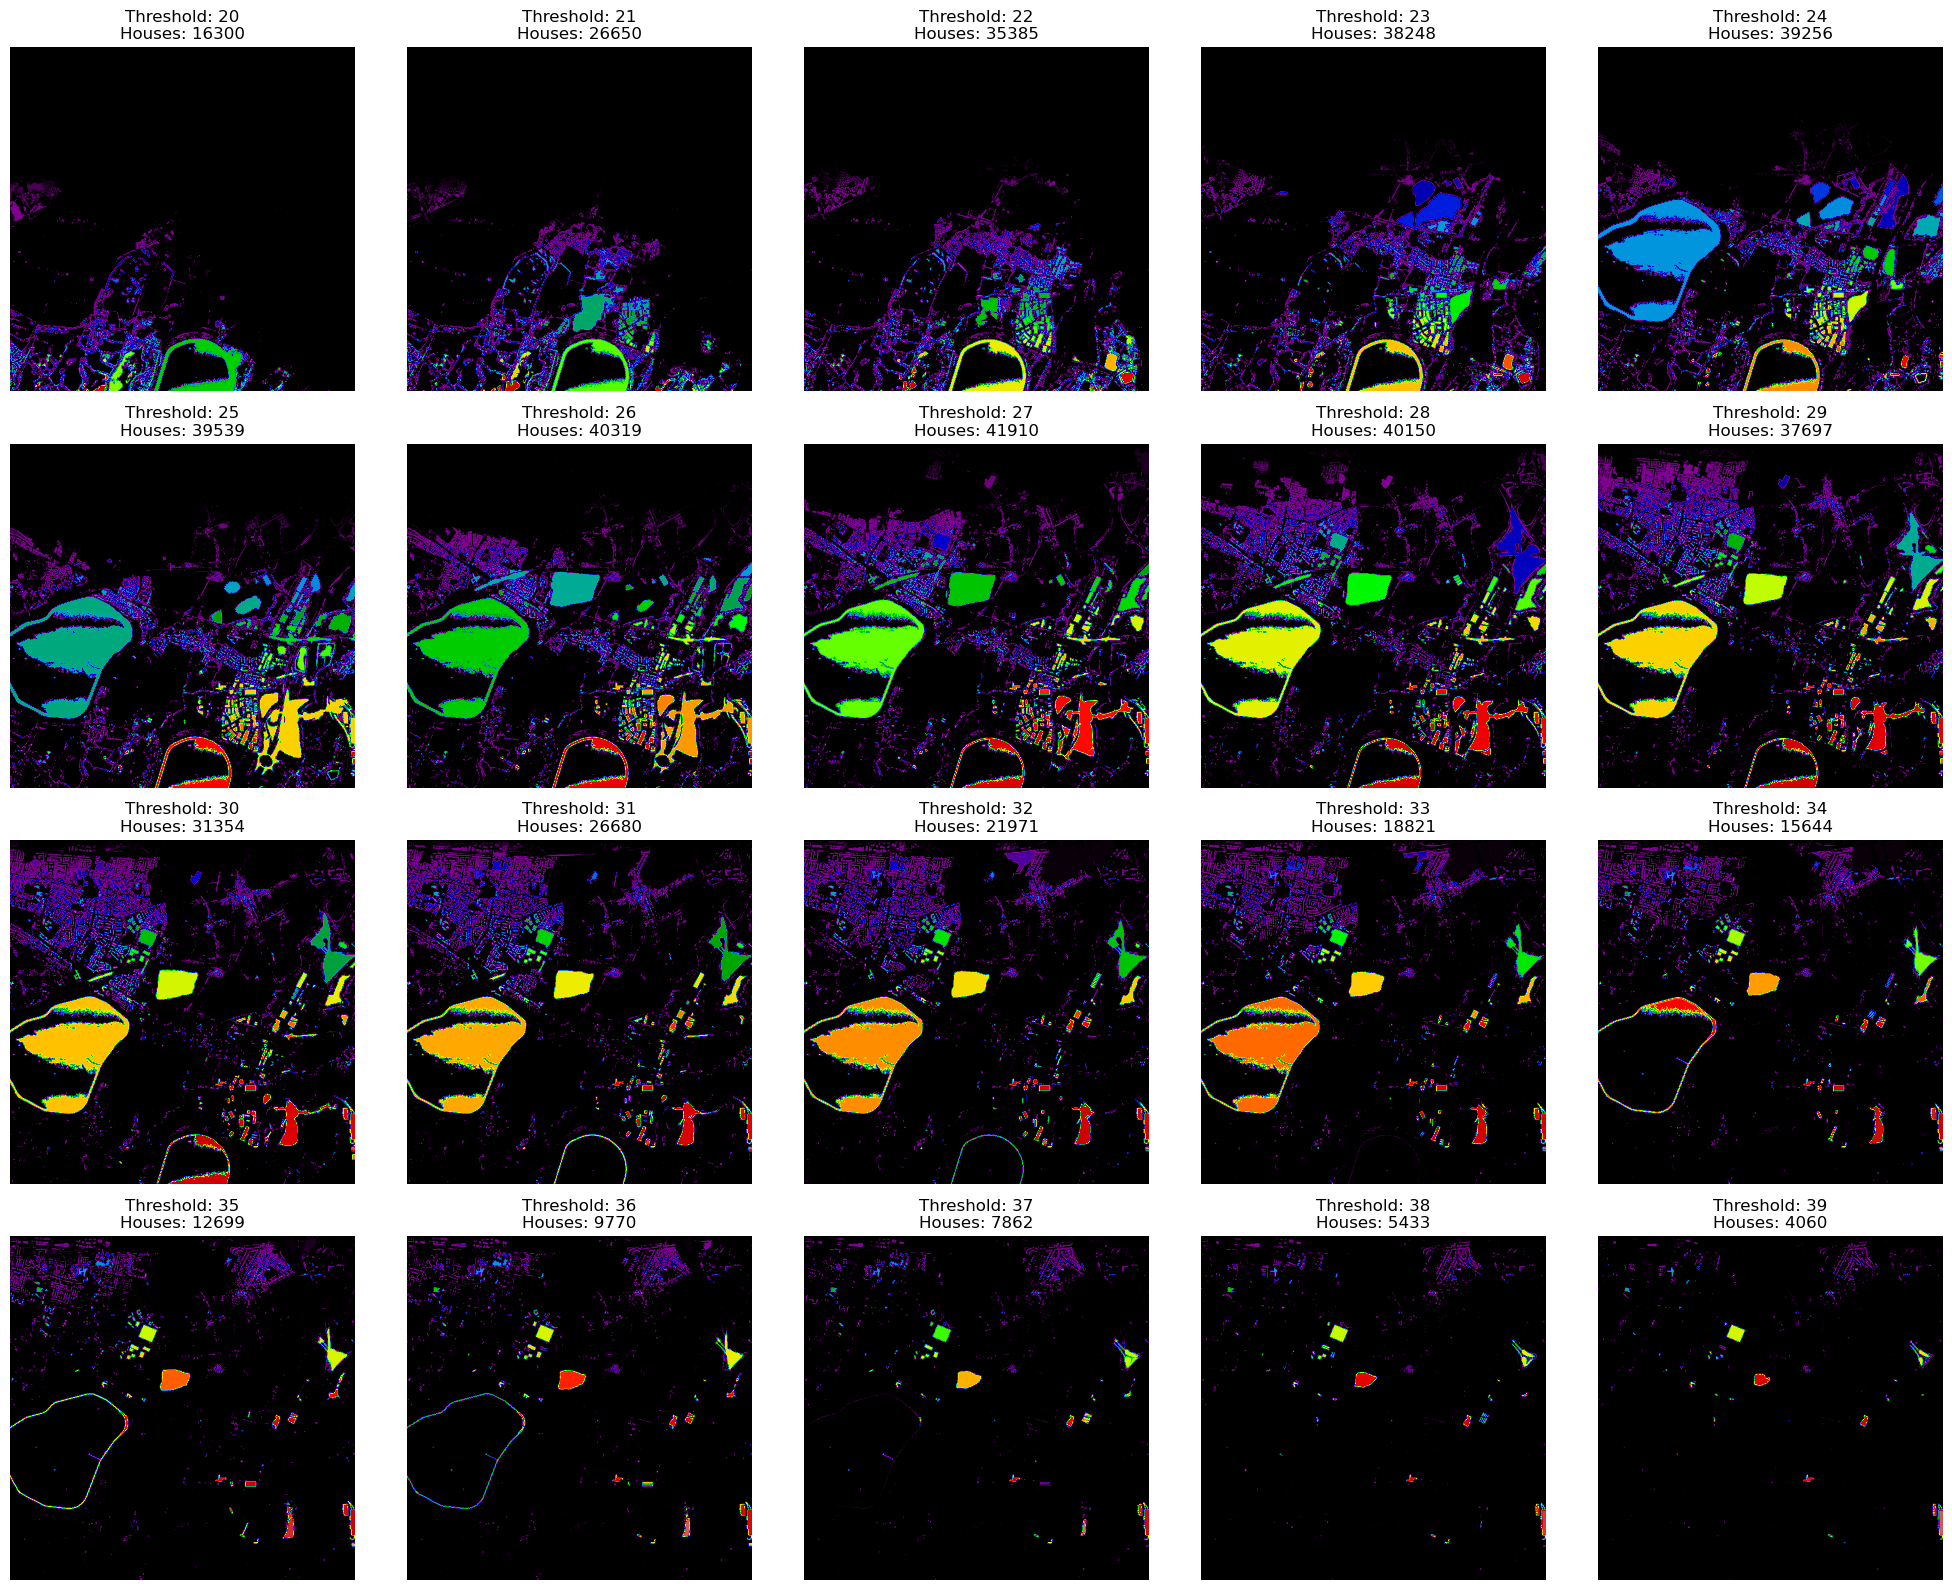

In [13]:
threshold_values = [20 + n for n in range(0, 20)]
fig, axes = plt.subplots(4, 5, figsize=(20, 16))

for ax, threshold in zip(axes.flatten(), threshold_values):
    house_regions = lidar_data > threshold
    num_labels, labels_im = cv2.connectedComponents(house_regions.astype(np.uint8))
    
    ax.imshow(labels_im, cmap='nipy_spectral')
    ax.set_title(f'Threshold: {threshold}\nHouses: {num_labels - 1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

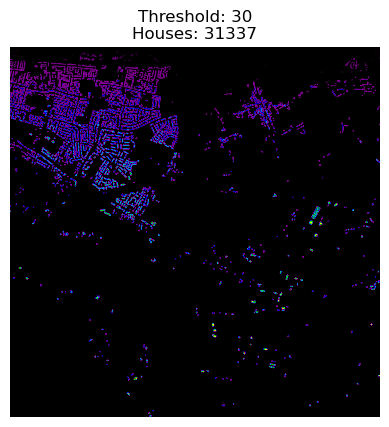

In [ ]:
min_size = 50  # Minimum size of objects to be considered as houses
max_size = 1000  # Maximum size of objects to be considered as houses

threshold = 30
house_regions = lidar_data > threshold
num_labels, labels_im = cv2.connectedComponents(house_regions.astype(np.uint8))

# Filter out excessively large objects
filtered_labels_im = np.zeros_like(labels_im)
for label in range(1, num_labels):
    label_mask = labels_im == label
    label_size = np.sum(label_mask)
    if min_size <= label_size <= max_size:
        filtered_labels_im[label_mask] = label

plt.imshow(filtered_labels_im, cmap='nipy_spectral')
plt.title(f'Threshold: {threshold}\nHouses: {np.max(filtered_labels_im)}')
plt.axis('off')
plt.show()


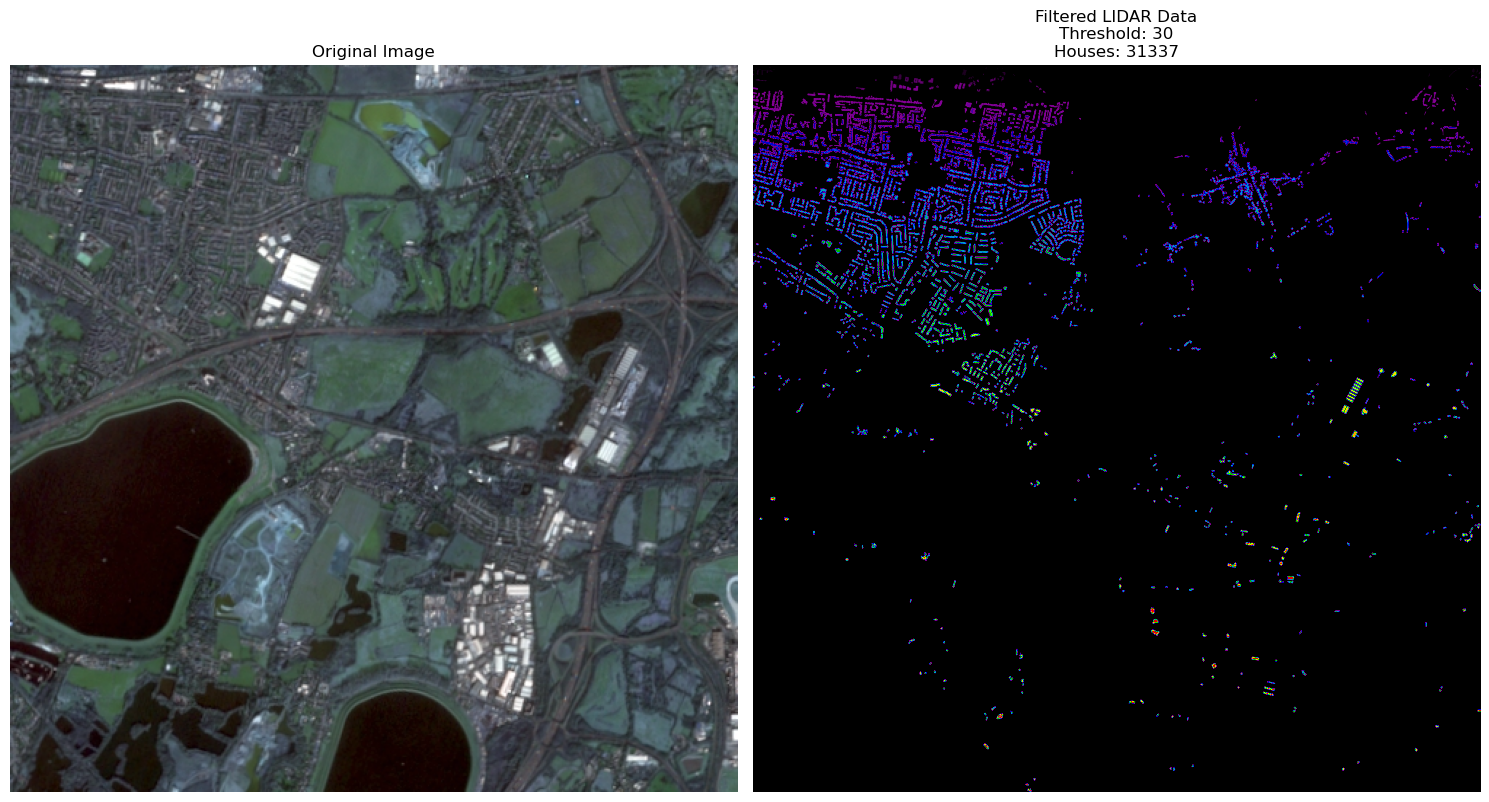

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# Plot the original image
axes[0].imshow(img)
axes[0].set_title('Original Image')
axes[0].axis('off')

# Plot the filtered LIDAR data
axes[1].imshow(filtered_labels_im, cmap='nipy_spectral')
axes[1].set_title(f'Filtered LIDAR Data\nThreshold: {threshold}\nHouses: {np.max(filtered_labels_im)}')
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
min_size = 25  # Minimum size of objects to be considered as houses
max_size = 1500  # Maximum size of objects to be considered as houses

threshold = 30
house_regions = lidar_data > threshold
num_labels, labels_im = cv2.connectedComponents(house_regions.astype(np.uint8))

# Filter out excessively large objects
filtered_labels_im = np.zeros_like(labels_im)
for label in range(1, num_labels):
    label_mask = labels_im == label
    label_size = np.sum(label_mask)
    if min_size <= label_size <= max_size:
        filtered_labels_im[label_mask] = label

plt.imshow(filtered_labels_im, cmap='nipy_spectral')
plt.title(f'Threshold: {threshold}\nHouses: {np.max(filtered_labels_im)}')
plt.axis('off')
plt.show()